# Predicting which passengers survived the Titanic shipwreck.

## 1. Problem definition 
- How well can we predict which passengers survived the Titanic shipwreck.

## 2. Data
The data is downloaded from the Kaggle Titanic: Machine Learning from Disaster: https://www.kaggle.com/c/titanic/overview

## 3. Data Dictionary
- survival: 0 = No, 1 = Yes
- pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex: Sex	
- Age: Age in years	
- sibsp:	# of siblings / spouses aboard the Titanic	
- parch:	# of parents / children aboard the Titanic	
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

### 3. Exploring data 

In [2]:
# Import data
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check whether data has missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Let's see how many survived (1) and didn't (0)

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

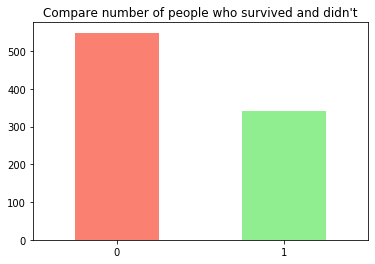

In [7]:
df.Survived.value_counts().plot.bar(title="Compare number of people who survived and didn't", color=['salmon','lightgreen'])
plt.xticks(rotation='horizontal');

#### Check frequency according to Gender

In [8]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


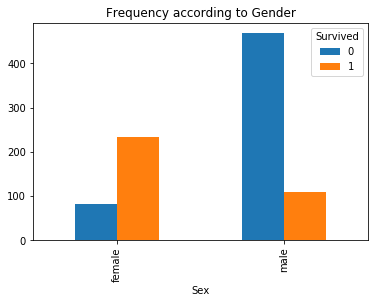

In [10]:
# Make more visualy 
pd.crosstab(df.Sex, df.Survived).plot(kind='bar', title='Frequency according to Gender');

#### Age

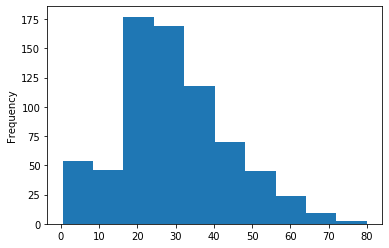

In [11]:
df.Age.plot.hist();

#### Corelation matrix

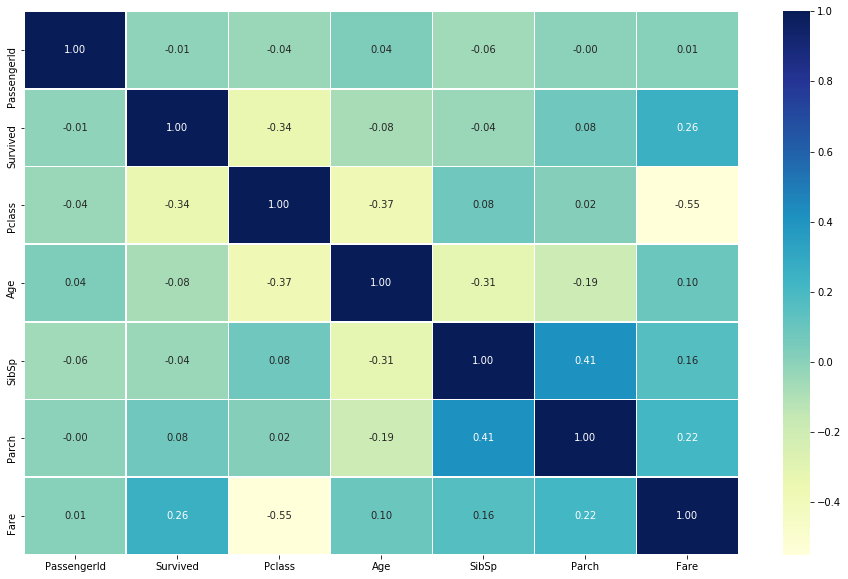

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## 4. Modeling 

#### Filling missing data

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Fill the missing data with mean age
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

In [15]:
# Cabin has to much missing data and it won't be helpfull for us so I will drop it
df.drop('Cabin', axis=1, inplace=True)

In [16]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# We gonna fill missing 2 values in Embarked with 'S' because most of data has it
df.Embarked.fillna('S', inplace=True)

#### Convert data into categories/numbers

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
# Columns that contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Embarked


In [20]:
# Function that convert strings --> categorical
def convert(df):
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = df[label].astype('category')

convert(df)

In [21]:
# Now we can see that we don't have strings anymore
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Embarked       category
dtype: object

In [22]:
# Now we must turn category --> numeric
def conver_cat(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
            
conver_cat(df)

In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int16
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Embarked          int8
dtype: object

#### Build our model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {'Linear SVC': svm.SVC(),
          'Neighboors': KNeighborsClassifier(),
          'RandomForest': RandomForestClassifier(),
          'Linear Reg': LinearRegression(),
          'Logistic Reg': LogisticRegression()
}
models.values

np.random.seed(42)

# Split data into X & y
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def fit_score(model, X_train, X_test, y_train, y_test):

    # Fit and score
    results = {}
    for name, model in models.items():
        
        # fit model
        model.fit(X_train, y_train)
        
        # score
        results[name] = model.score(X_test, y_test)
    return results
    
results = fit_score(models, X_train, X_test, y_train, y_test)
results

C:\Users\HP\Desktop\ML_projects\titanic_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.6703910614525139,
 'Neighboors': 0.664804469273743,
 'RandomForest': 0.8324022346368715,
 'Linear Reg': 0.4407473542802888,
 'Logistic Reg': 0.7486033519553073}

#### Model comparison (accuracy)

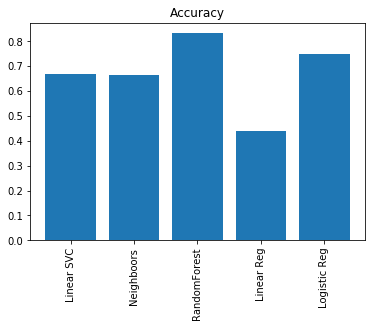

In [26]:
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()), rotation='vertical')
plt.title('Accuracy')
plt.show()

## 4. Tunning RandomForestClassifier with Randomized SearchCV

In [37]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_jobs=-1,
                              verbose=2)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.3s finished


Wall time: 29.6 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [39]:
# Best params
rs_model.best_params_

{'n_estimators': 760,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [40]:
rs_model.score(X_test, y_test)

0.8212290502793296

We have almost the same results so let's try GridSearchCV

In [51]:
from sklearn.model_selection import cross_val_score

# Try different numbers of estimators with cross-validation and no cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {model.score(X_test, y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.8044692737430168
Cross-validation score: 81.26608499152596%

Trying model with 20 estimators...
Model accruacy on test set: 0.8212290502793296
Cross-validation score: 81.15560856192327%

Trying model with 30 estimators...
Model accruacy on test set: 0.8268156424581006
Cross-validation score: 81.60002510827947%

Trying model with 40 estimators...
Model accruacy on test set: 0.8156424581005587
Cross-validation score: 83.5038603979662%

Trying model with 50 estimators...
Model accruacy on test set: 0.8268156424581006
Cross-validation score: 82.26727763480008%

Trying model with 60 estimators...
Model accruacy on test set: 0.8212290502793296
Cross-validation score: 82.6062394074446%

Trying model with 70 estimators...
Model accruacy on test set: 0.8379888268156425
Cross-validation score: 83.16929257422633%

Trying model with 80 estimators...
Model accruacy on test set: 0.8212290502793296
Cross-validation score: 81.71489548678

Let's try our model on real test data

In [57]:
real_data = pd.read_csv('data/test.csv')
real_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
real_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Converting all data to numeric

In [62]:
# We will use funcion we have build recently
convert(real_data)

In [64]:
conver_cat(real_data)

#### Filling missing data

In [70]:
real_data.fillna(df['Age'].mean(), inplace=True)

In [77]:
real_data.drop('Cabin', axis=1, inplace=True)

## Predicting real data with model

In [100]:
preds_real_data = model.predict(real_data)

In [101]:
# Creata dataframe  as kaglle expect
df_end = pd.DataFrame()
df_end['PassengerId'] = real_data['PassengerId']
df_end['Survived'] = preds_real_data

In [102]:
# View of data
df_end.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [103]:
# Save our data
df_end.to_csv('titanic_result.csv', index=False)

In [104]:
df_end.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
